In [1]:
from pathlib import Path
import requests

DATA_PATH = Path("data")
PATH = DATA_PATH / "mnist"

PATH.mkdir(parents=True, exist_ok=True)

URL = "https://github.com/pytorch/tutorials/raw/main/_static/"
FILENAME = "mnist.pkl.gz"

if not (PATH / FILENAME).exists():
        content = requests.get(URL + FILENAME).content
        (PATH / FILENAME).open("wb").write(content)

In [3]:
import pickle
import gzip

with gzip.open((PATH / FILENAME).as_posix(), "rb") as f:
        ((x_train, y_train), (x_valid, y_valid), (x_test,y_test)) = pickle.load(f, encoding="latin-1")

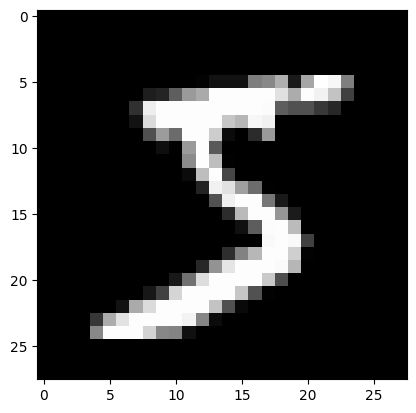

(50000, 784)


In [4]:
import matplotlib.pyplot as plt
import numpy as np

plt.imshow(x_train[0].reshape((28, 28)), cmap="gray")
# ``pyplot.show()`` only if not on Colab
plt.show()
print(x_train.shape)

In [6]:
import torch

x_train, y_train, x_valid, y_valid, x_test, y_test = map(
    torch.tensor, (x_train, y_train, x_valid, y_valid, x_test, y_test)
)
n, c = x_train.shape
print(x_train, y_train)
print(x_train.shape)
print(y_train.min(), y_train.max())

tensor([[0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.],
        ...,
        [0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.]]) tensor([5, 0, 4,  ..., 8, 4, 8])
torch.Size([50000, 784])
tensor(0) tensor(9)


In [9]:
import math

weights = torch.randn(784, 10) / math.sqrt(784)
weights.requires_grad_()
bias = torch.zeros(10, requires_grad=True)
weights.shape

torch.Size([784, 10])

In [11]:
def log_softmax(x):
    return x - x.exp().sum(-1).log().unsqueeze(-1)

def model(xb):
    return log_softmax(xb @ weights + bias)

In [12]:
bs = 64  # batch size

xb = x_train[0:bs]  # a mini-batch from x
preds = model(xb)  # predictions
preds[0], preds.shape
print(preds[0], preds.shape)

tensor([-2.2854, -1.9922, -2.6174, -2.3783, -2.2574, -2.3801, -2.4374, -2.8706,
        -2.1327, -1.9918], grad_fn=<SelectBackward0>) torch.Size([64, 10])


In [15]:
def nll(input, target):
    return -input[range(target.shape[0]), target].mean()

loss_func = nll

In [16]:
yb = y_train[0:bs]
print(loss_func(preds, yb))

tensor(2.3503, grad_fn=<NegBackward0>)


In [17]:
yb = y_train[0:bs]
print(loss_func(preds, yb))

tensor(2.3503, grad_fn=<NegBackward0>)


In [19]:
def accuracy(out, yb):
    preds = torch.argmax(out, dim=1)
    return (preds == yb).float().mean()

print(accuracy(preds, yb))


tensor(0.1719)


In [21]:
from IPython.core.debugger import set_trace

lr = 0.5  # learning rate
epochs = 2  # how many epochs to train for

for epoch in range(epochs):
    for i in range((n - 1) // bs + 1):
        #         set_trace()
        start_i = i * bs
        end_i = start_i + bs
        xb = x_train[start_i:end_i]
        yb = y_train[start_i:end_i]
        pred = model(xb)
        loss = loss_func(pred, yb)

        loss.backward()
        with torch.no_grad():
            weights -= weights.grad * lr
            bias -= bias.grad * lr
            weights.grad.zero_()
            bias.grad.zero_()

In [22]:
print(loss_func(model(xb), yb), accuracy(model(xb), yb))

tensor(0.0650, grad_fn=<NegBackward0>) tensor(1.)


In [23]:
import torch.nn.functional as F

loss_func = F.cross_entropy

def model(xb):
    return xb @ weights + bias

In [24]:
print(loss_func(model(xb), yb), accuracy(model(xb), yb))

tensor(0.0650, grad_fn=<NllLossBackward0>) tensor(1.)
